In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
import ccal

In [3]:
dir(ccal)

['GPSMap',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'apply_function_on_2_1d_arrays_and_compute_empirical_p_value',
 'apply_function_on_2_2d_arrays_slices',
 'assign_colors',
 'cast_series_to_builtins',
 'cast_str_to_builtins',
 'clean_git_url',
 'clean_name',
 'clean_path',
 'cluster',
 'cluster_2d_array_rows',
 'cluster_2d_array_slices_by_group',
 'compute_1d_array_cumulative_sum',
 'compute_brier_entropy',
 'compute_empirical_p_value',
 'compute_empirical_p_values_and_fdrs',
 'compute_entropy',
 'compute_gene_scores',
 'compute_information_coefficient',
 'compute_information_distance',
 'compute_log_ratios',
 'compute_margin_of_error',
 'conda_is_installed',
 'copy_path',
 'count_coclustering_and_normalize',
 'create_gitkeep',
 'decorate_ax',
 'define_exponential_function',
 'download',
 'drop_df_slices',
 'drop_nan_and_apply_function_on_2_1d_arrays',
 'dump_gpsmap',
 'echo_or_print',
 'establish_p

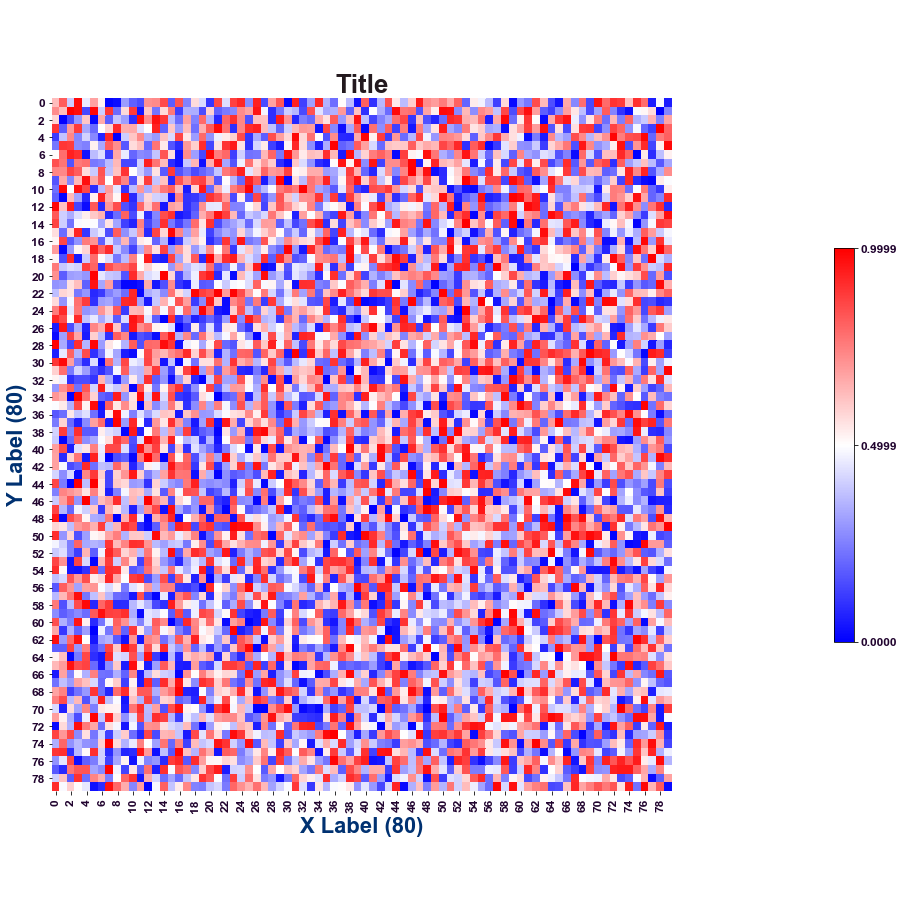

In [4]:
ccal.plot_heatmap(
    pd.DataFrame(np.random.random_sample((
        80,
        80, ))),
    title='Title',
    decorate_ax_kwargs={
        'xlabel': 'X Label',
        'ylabel': 'Y Label',
    })

Computing column-x-column distance with <function compute_information_distance at 0x11c5aae18> ...
HCC with K=2 ...
	(K=2) 30/30 - done.
HCC with K=3 ...
	(K=3) 30/30 - done.
HCC with K=4 ...
	(K=4) 30/30 - done.
HCC with K=5 ...
	(K=5) 30/30 - done.
HCC with K=6 ...
	(K=6) 30/30 - done.
HCC with K=7 ...
	(K=7) 30/30 - done.


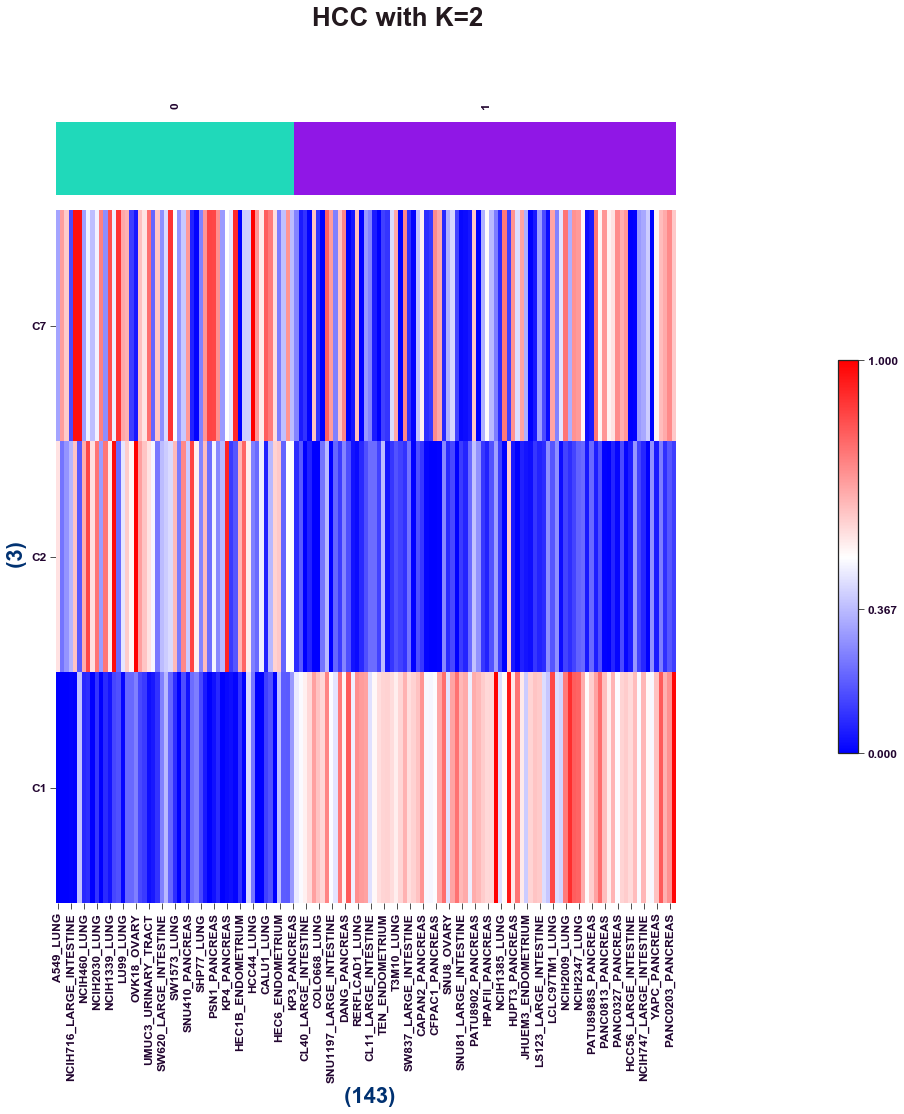

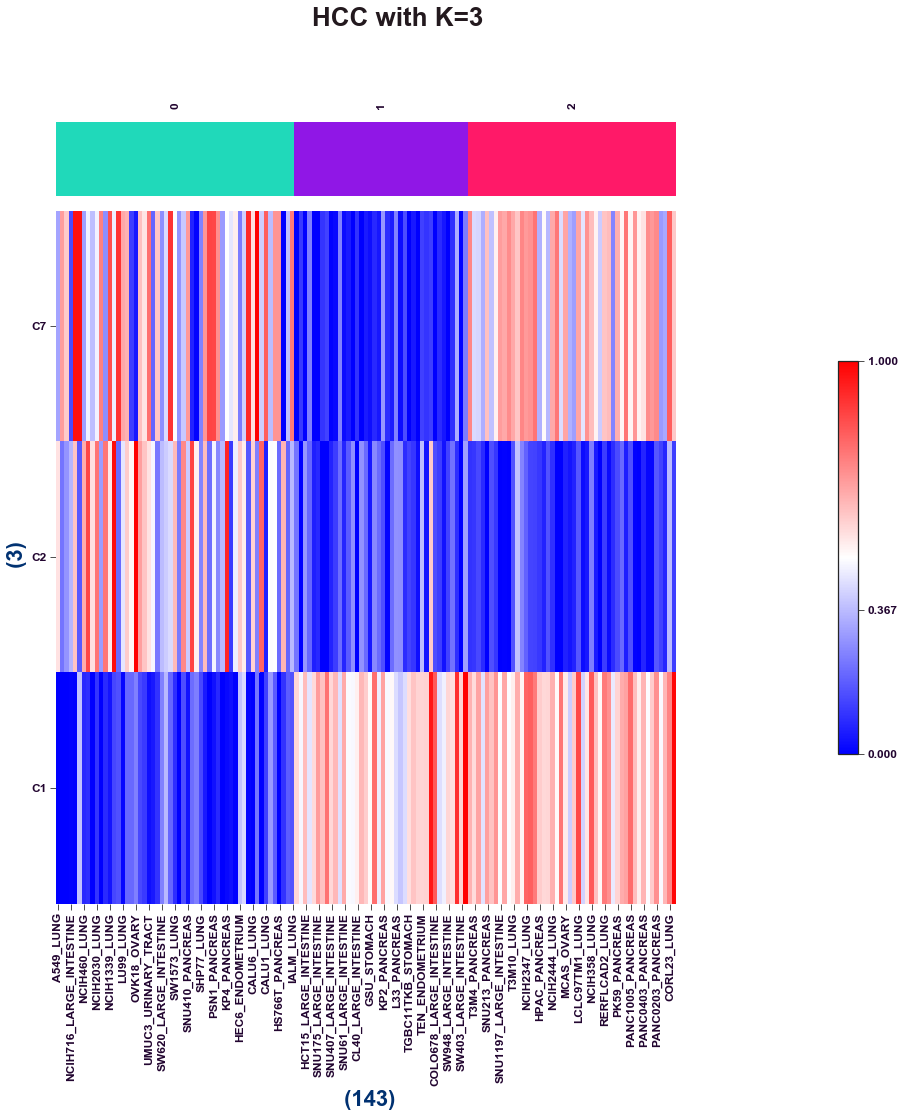

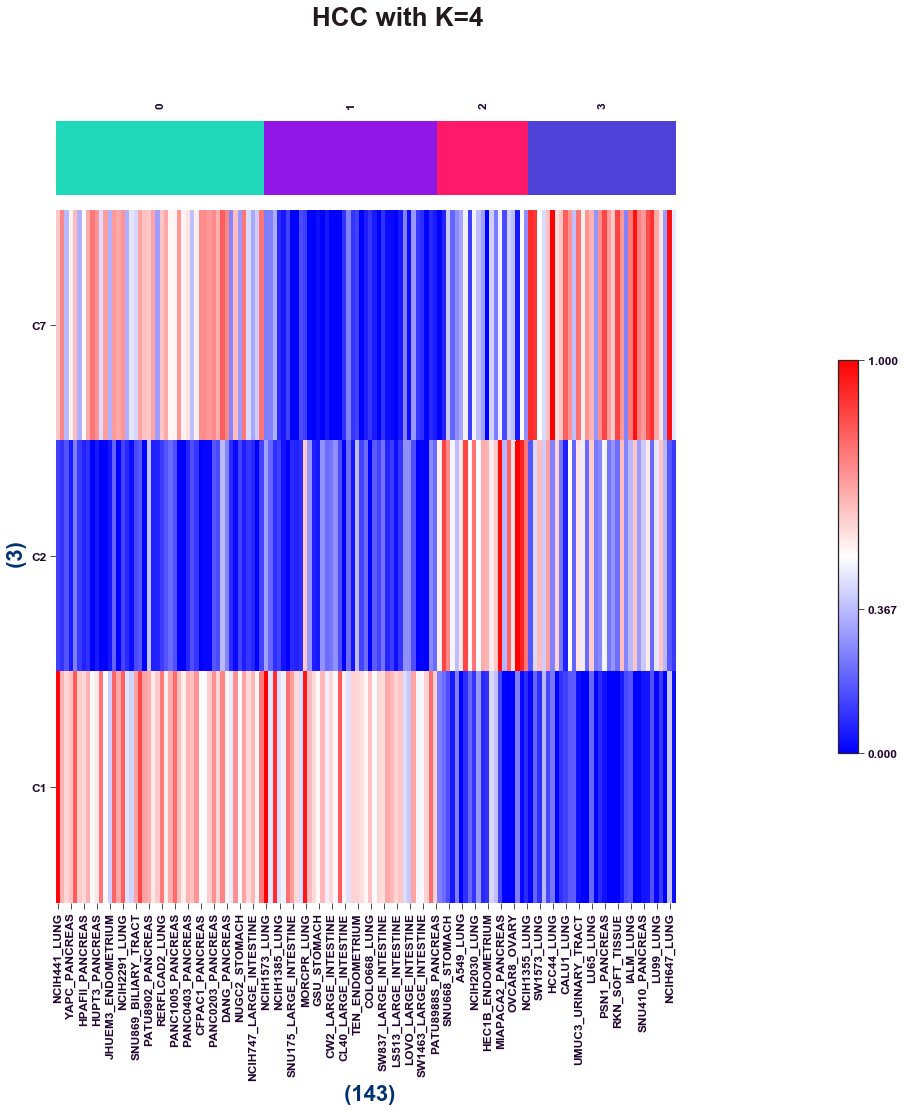

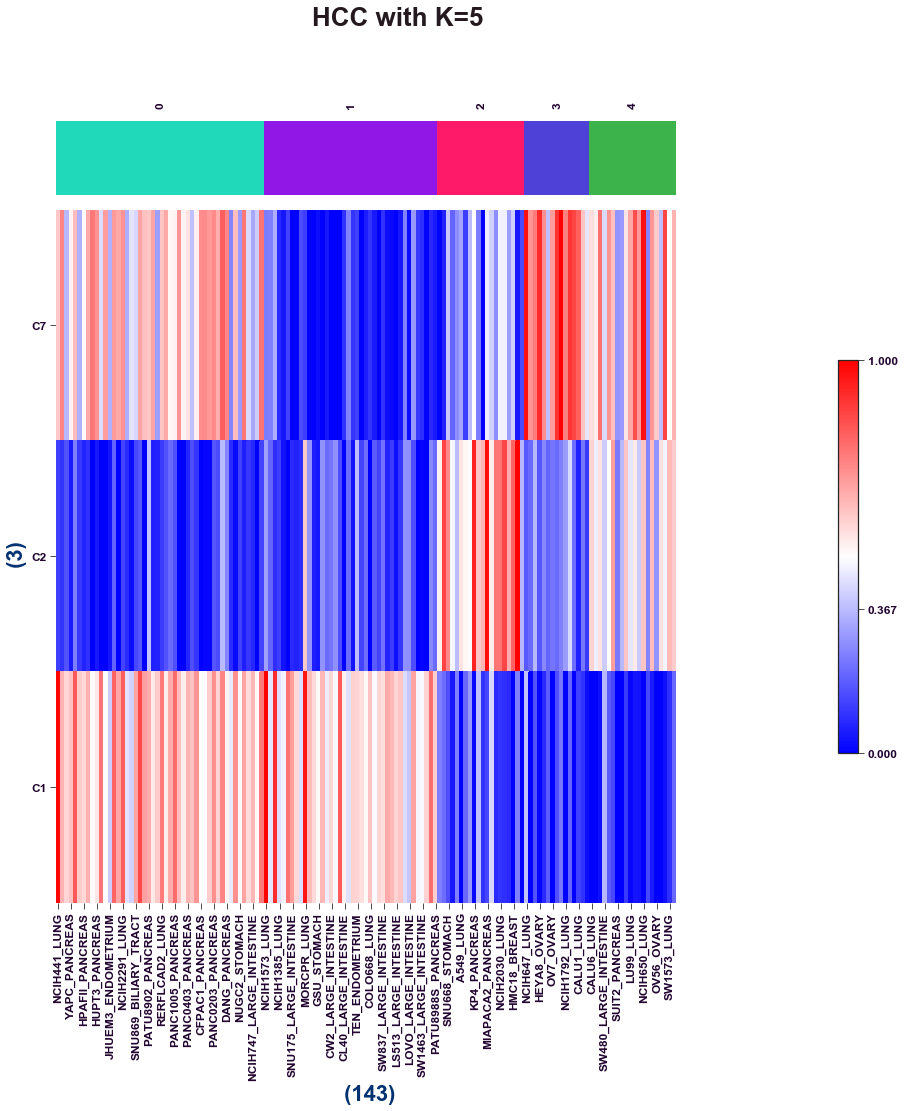

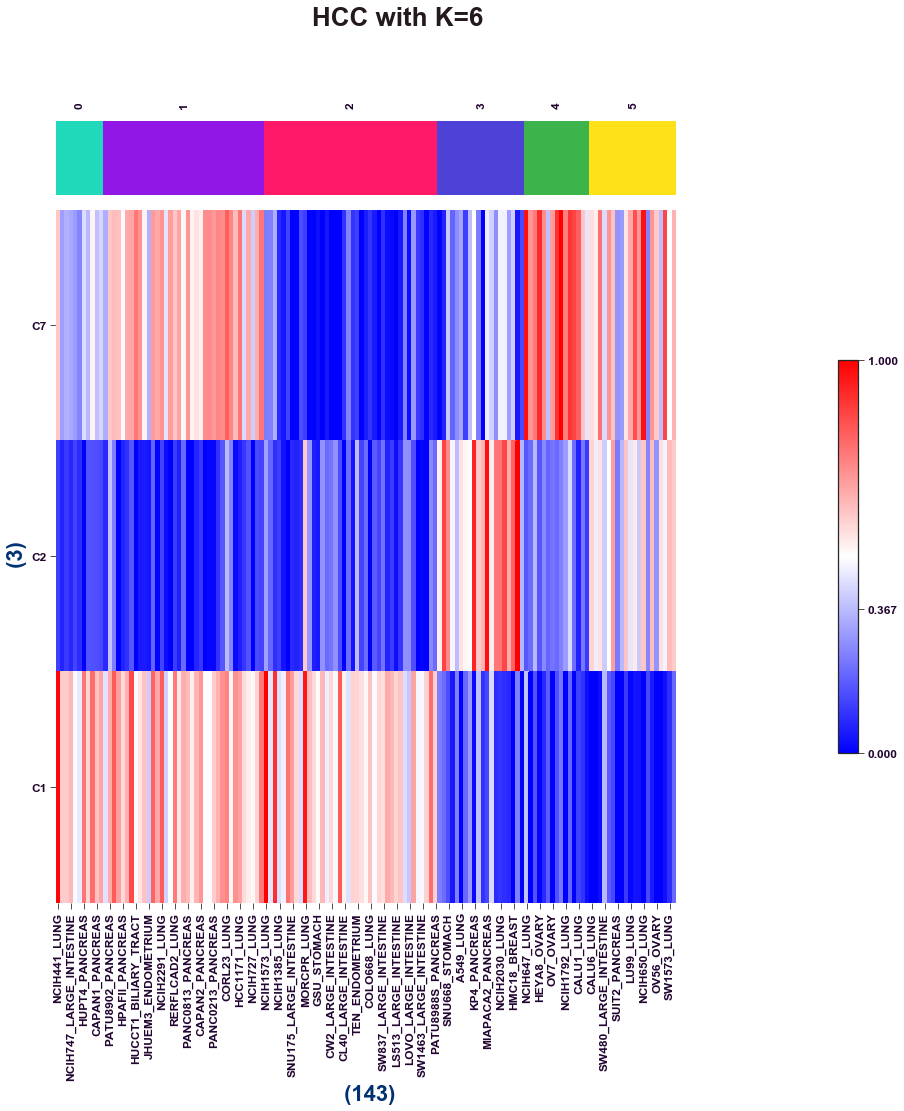

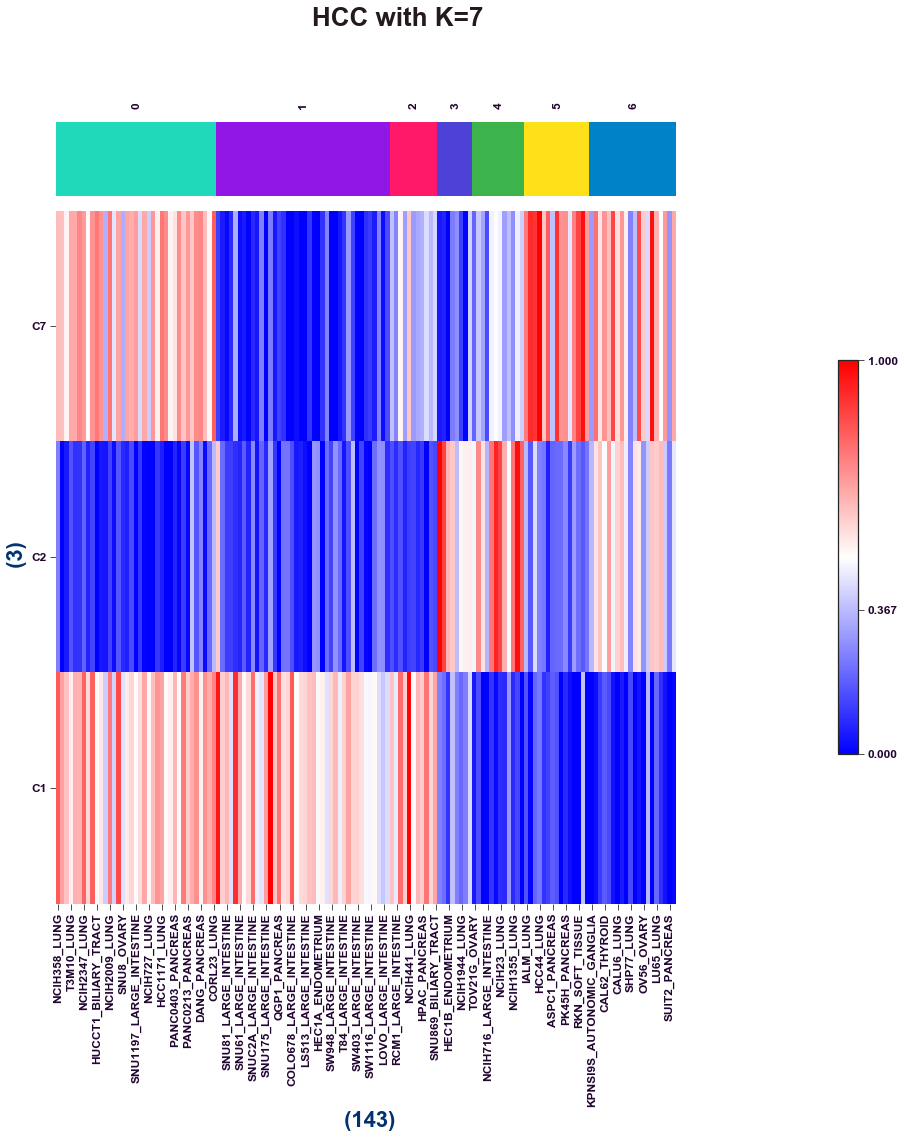

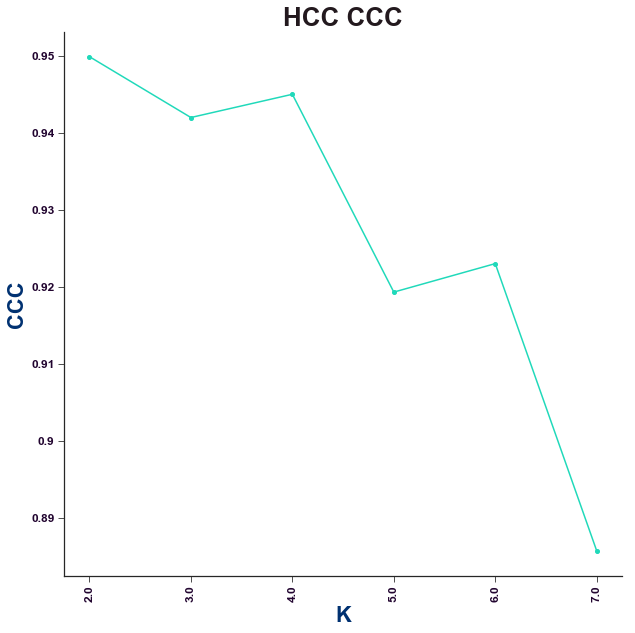

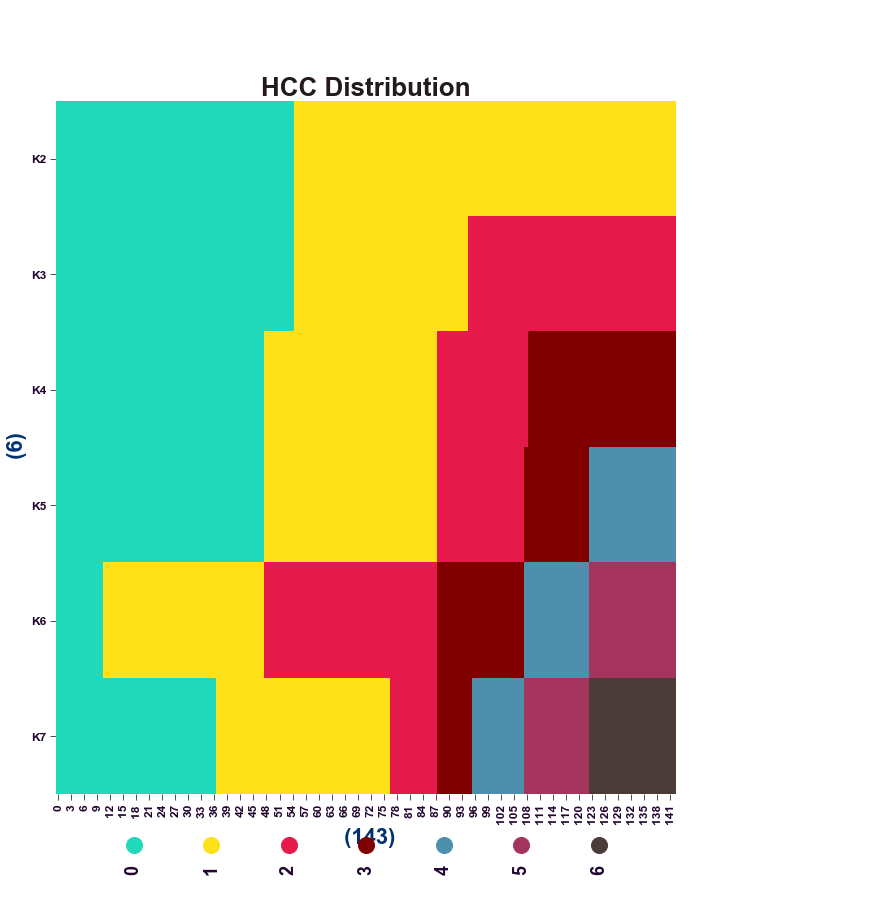

In [5]:
df = pd.read_table(
    'ccle_solid_cancers_kras_mutant/h_matrix__k_x_sample.tsv',
    sep='\t',
    index_col=0).loc[[
        'C7',
        'C2',
        'C1',
    ]]

df_normalized = pd.DataFrame(
    ccal.normalize_2d_array(
        ccal.normalize_2d_array(df.values, '-0-', axis=1).clip(-3, 3),
        '0-1',
        axis=1),
    index=df.index,
    columns=df.columns)

distance__column_x_column, k_hcc_distance_linkage, k_hcc_distance_linkage_ccc, hcc__k_x_column = ccal.explore_states(
    df_normalized,
    range(2, 8),
    distance_function=ccal.compute_information_distance)

In [6]:
sample_states = hcc__k_x_column.loc['K4']

/Users/k/Jumis/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


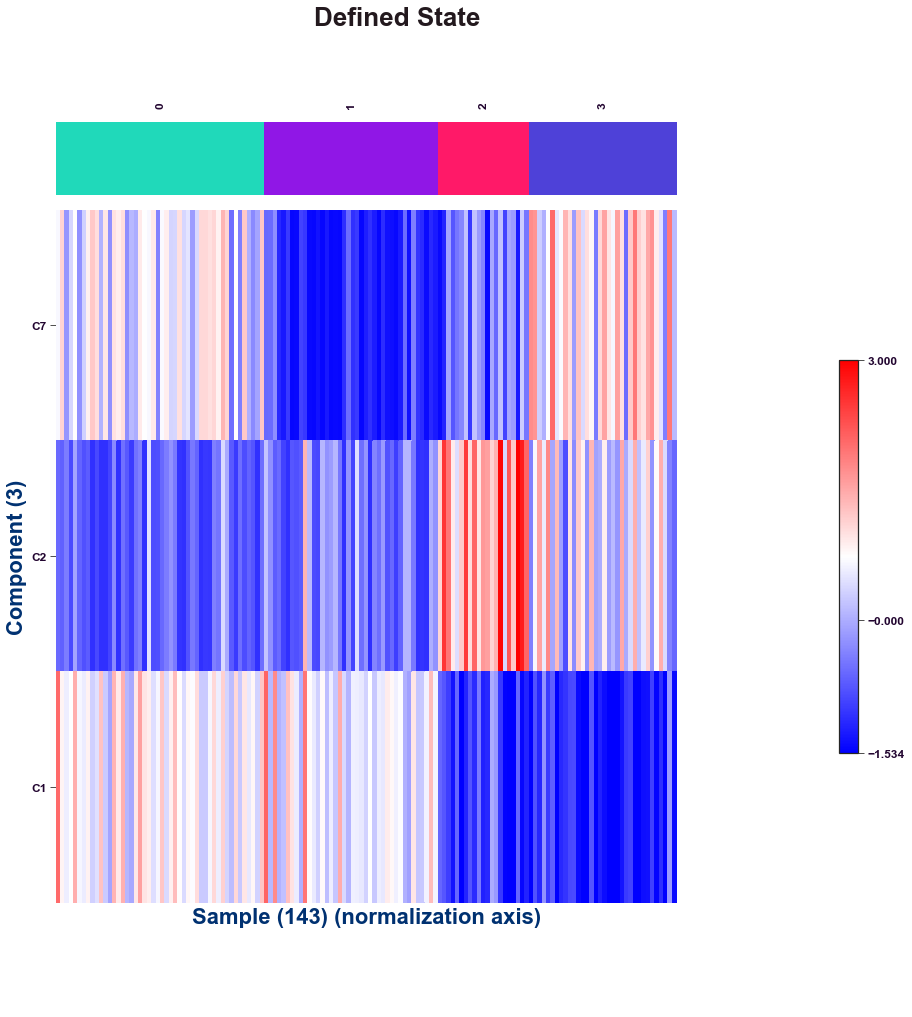

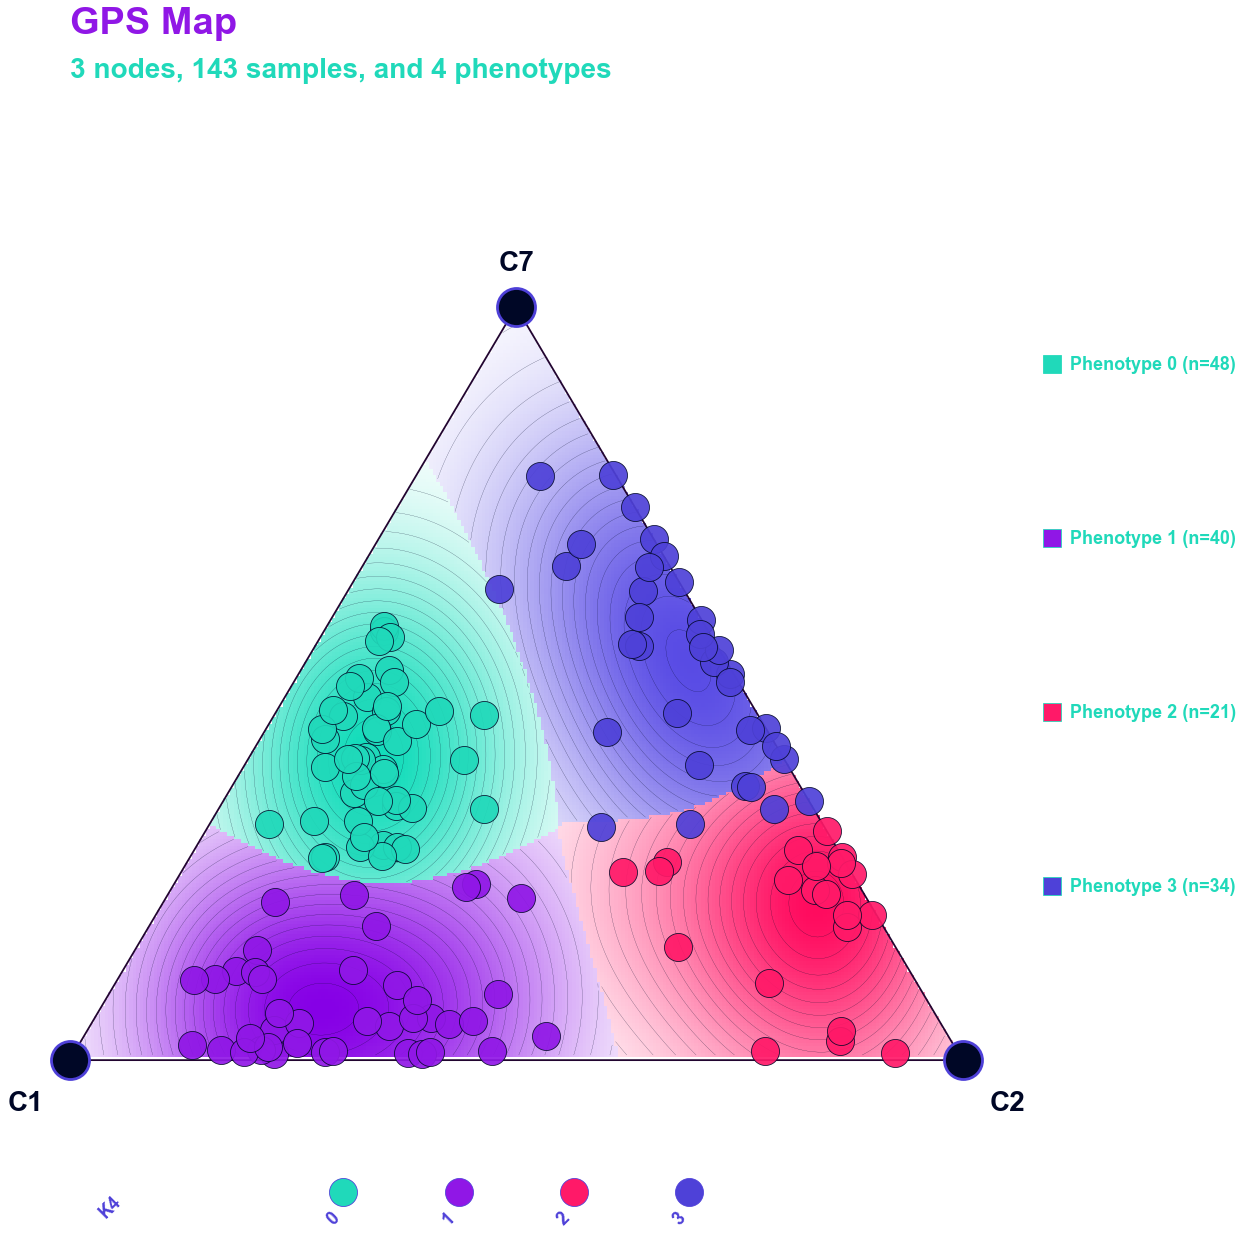

In [7]:
ccal.plot_heatmap(
    df_normalized,
    data_type='continuous',
    normalization_method='-0-',
    normalization_axis=1,
    column_annotation=sample_states,
    title='Defined State',
    heatmap_kwargs={
        'xticklabels': False,
    },
    decorate_ax_kwargs={
        'xlabel': 'Sample',
        'ylabel': 'Component',
    })

gps_map = ccal.GPSMap(
    df_normalized,
    pull_power=1.2,
    node_x_dimension=pd.DataFrame(
        [
            (
                0.5,
                np.sqrt(3) / 2, ),
            (
                1,
                0, ),
            (
                0,
                0, ),
        ], index=df.index))

gps_map.set_sample_phenotypes(
    sample_states, bandwidth_factor=2.8)

gps_map.plot_samples_with_phenotype()